Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [10]:
# imports
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

In [11]:
%store -r df
df

,id,name,latitude,longitude,available_bikes,unavailable_bikes
0,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,4,32
1,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,11,5
2,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,3,23
3,66f873d641d448bd1572ab086665a458,12th & Yukon (City Hall),49.260599,-123.113504,2,14
4,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,0,16
...,...,...,...,...,...,...
246,3dae5d936bb6b222d135eff52833e7f4,Bute & Davie,49.282047,-123.133057,6,14
247,10acadd77bc21f26a7f09d8c74d4af2d,Robson & Beatty,49.277773,-123.114237,7,13
248,58345bb719f4e570ed4edc9dfa6a68a2,West Mall Swing Space Building,49.263073,-123.254307,8,12
249,261efc67071963969b3f848c66454d97,Orchard Commons,49.259999,-123.250902,0,26


In [12]:
%store -r yelp_restaurant_df_d
yelp_restaurant_df_d

,name,location,category,latitude,longitude,review_count,rating,distance,type
0,Xin Chào,"2559 Cambie Street, Vancouver, BC V5Z 3Y6, Canada",vietnamese,49.262612,-123.115154,3,4.0,56.643752,restaurant
1,Seaport City Seafood Restaurant,"2425 Cambie Street, Vancouver, BC V5Z 4M5, Canada",dimsum,49.263921,-123.115152,52,4.3,168.615262,restaurant
2,Saku,"548 W Broadway, Vancouver, BC V5Z 1E9, Canada",japanese,49.263101,-123.116675,250,4.3,178.845344,restaurant
3,La Taqueria Pinche Taco Shop,"2450 Yukon Street, Vancouver, BC V5Z 3V6, Canada",mexican,49.263559,-123.112736,684,4.2,169.517456,restaurant
4,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",cafes,49.263380,-123.114150,289,4.0,102.329817,restaurant
...,...,...,...,...,...,...,...,...,...
4973,Freshii,"3351 Wesbrook Mall, Vancouver, BC V6S 0E3, Canada",vegetarian,49.254493,-123.235487,13,2.8,70.443227,restaurant
4974,Blenz Coffee,"3381 Wesbrook Mall, Vancouver, BC V6S 0B1, Canada",coffee,49.254532,-123.235484,29,3.3,59.437337,restaurant
4975,Bubble Waffle Cafe,"105B-6190 Agronomy Road, UBC, Vancouver, BC V6...",waffles,49.261391,-123.246318,0,0.0,1038.485055,restaurant
4976,Fit For Life,"6190 Agronomy Road, Unit 105, Technology Enter...",sandwiches,49.261327,-123.246573,6,1.7,1017.181622,restaurant


In [13]:
%store -r yelp_grocery_df_d
yelp_grocery_df_d

,name,location,category,latitude,longitude,review_count,rating,distance,type
0,Whole Foods Market,"510 W 8th Ave, Vancouver, BC V5Z 1C5, Canada",grocery,49.264000,-123.115288,252,3.5,180.230107,grocery
1,Save-On-Foods,"2308 Cambie Street, Vancouver, BC V5Z 2T8, Canada",grocery,49.264701,-123.114135,80,2.8,248.630299,grocery
2,Joti's No Frills,"310 W Broadway, Vancouver, BC V5Y 1R2, Canada",grocery,49.262844,-123.111866,68,3.5,187.925979,grocery
3,Sungiven Foods,"555 W 12th Avenue, Unit 42, Vancouver, BC V5Z ...",intlgrocery,49.260902,-123.116883,21,3.3,252.207815,grocery
4,Kin's Farm Market - City Square Mall,"555 W 12th Avenue, Unit 19, Vancouver, BC V5Z ...",markets,49.260874,-123.116373,17,3.5,229.603334,grocery
...,...,...,...,...,...,...,...,...,...
4554,Granville Island Produce At University,"5767 Dalhousie Road, Vancouver, BC V6T 2H9, Ca...",grocery,49.265791,-123.242956,12,2.5,703.275166,grocery
4555,Mini Super,"5728 University Boulevard, Suite 102, Vancouve...",grocery,49.267014,-123.242285,2,2.0,726.361428,grocery
4561,Urban Fare,"5380 University Boulevard, Unit 107, leləm̓ Vi...",grocery,49.265734,-123.237070,2,4.0,838.191914,grocery
4563,Save-On-Foods,"5945 Berton Avenue, Vancouver, BC V6S 0B3, Canada",grocery,49.254823,-123.236595,24,2.6,987.178369,grocery


In [14]:
merged_df = pd.concat([yelp_grocery_df_d, yelp_restaurant_df_d], ignore_index=True)

merged_df#join grocery data and restaurant data

,name,location,category,latitude,longitude,review_count,rating,distance,type
0,Whole Foods Market,"510 W 8th Ave, Vancouver, BC V5Z 1C5, Canada",grocery,49.264000,-123.115288,252,3.5,180.230107,grocery
1,Save-On-Foods,"2308 Cambie Street, Vancouver, BC V5Z 2T8, Canada",grocery,49.264701,-123.114135,80,2.8,248.630299,grocery
2,Joti's No Frills,"310 W Broadway, Vancouver, BC V5Y 1R2, Canada",grocery,49.262844,-123.111866,68,3.5,187.925979,grocery
3,Sungiven Foods,"555 W 12th Avenue, Unit 42, Vancouver, BC V5Z ...",intlgrocery,49.260902,-123.116883,21,3.3,252.207815,grocery
4,Kin's Farm Market - City Square Mall,"555 W 12th Avenue, Unit 19, Vancouver, BC V5Z ...",markets,49.260874,-123.116373,17,3.5,229.603334,grocery
...,...,...,...,...,...,...,...,...,...
1036,Freshii,"3351 Wesbrook Mall, Vancouver, BC V6S 0E3, Canada",vegetarian,49.254493,-123.235487,13,2.8,70.443227,restaurant
1037,Blenz Coffee,"3381 Wesbrook Mall, Vancouver, BC V6S 0B1, Canada",coffee,49.254532,-123.235484,29,3.3,59.437337,restaurant
1038,Bubble Waffle Cafe,"105B-6190 Agronomy Road, UBC, Vancouver, BC V6...",waffles,49.261391,-123.246318,0,0.0,1038.485055,restaurant
1039,Fit For Life,"6190 Agronomy Road, Unit 105, Technology Enter...",sandwiches,49.261327,-123.246573,6,1.7,1017.181622,restaurant


BELOW IS THE DATA AUDIT/EDA PROCESS

In [15]:
merged_df_d=merged_df.copy()
merged_df_d.drop_duplicates(subset=['name', 'latitude', 'longitude'], inplace=True)
#Check for duplicates

In [16]:
merged_df.shape

(1041, 9)

In [17]:
merged_df_d.shape 
#duplicates detected and dropped

(1029, 9)

In [18]:
merged_df1 = pd.merge(df, merged_df_d, left_on=['latitude'], right_on=['latitude'], how='left')

merged_df1#join city bike data and restaurant, grocery data with latitude column



,id,name_x,latitude,longitude_x,available_bikes,unavailable_bikes,name_y,location,category,longitude_y,review_count,rating,distance,type
0,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,4,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,11,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,3,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66f873d641d448bd1572ab086665a458,12th & Yukon (City Hall),49.260599,-123.113504,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3dae5d936bb6b222d135eff52833e7f4,Bute & Davie,49.282047,-123.133057,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,10acadd77bc21f26a7f09d8c74d4af2d,Robson & Beatty,49.277773,-123.114237,7,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,58345bb719f4e570ed4edc9dfa6a68a2,West Mall Swing Space Building,49.263073,-123.254307,8,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,261efc67071963969b3f848c66454d97,Orchard Commons,49.259999,-123.250902,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df1.dropna() #drop all null data but there are only 1 data point remaining

,id,name_x,latitude,longitude_x,available_bikes,unavailable_bikes,name_y,location,category,longitude_y,review_count,rating,distance,type
189,9c1397c06e07bf74fc049f1a0872eea0,Balaclava & Broadway,49.264483,-123.173926,13,5,Persia Foods,"2827 West Broadway, Vancouver, BC V6K 2G6, Canada",grocery,-123.169195,60.0,3.8,954.446756,grocery


In [20]:
merged_df2 = pd.merge(df, merged_df_d, left_on=['longitude'], right_on=['longitude'], how='left')

merged_df2#join city bike data and restaurant, grocery data with longitude column

,id,name_x,latitude_x,longitude,available_bikes,unavailable_bikes,name_y,location,category,latitude_y,review_count,rating,distance,type
0,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,4,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,11,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,3,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66f873d641d448bd1572ab086665a458,12th & Yukon (City Hall),49.260599,-123.113504,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3dae5d936bb6b222d135eff52833e7f4,Bute & Davie,49.282047,-123.133057,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,10acadd77bc21f26a7f09d8c74d4af2d,Robson & Beatty,49.277773,-123.114237,7,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,58345bb719f4e570ed4edc9dfa6a68a2,West Mall Swing Space Building,49.263073,-123.254307,8,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,261efc67071963969b3f848c66454d97,Orchard Commons,49.259999,-123.250902,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
merged_df2.dropna() #drop all Nan data but there are no data point remaining

,id,name_x,latitude_x,longitude,available_bikes,unavailable_bikes,name_y,location,category,latitude_y,review_count,rating,distance,type


In [22]:
merged_df3 = pd.merge(df, merged_df_d, left_on=['latitude','longitude','name'], right_on=['latitude','longitude','name'], how='outer')

merged_df3#join city bike data and restaurant, grocery data with outer join

,id,name,latitude,longitude,available_bikes,unavailable_bikes,location,category,review_count,rating,distance,type
0,NaN,Southern Delicacy,49.231350,-123.155937,NaN,NaN,"6055 West Blvd, Vancouver, BC V6M 3X2, Canada",chinese,18.0,4.2,754.415239,restaurant
1,NaN,Sandeul,49.231636,-123.155857,NaN,NaN,"6019 West Blvd, Vancouver, BC V6M 3X2, Canada",korean,8.0,3.9,722.168567,restaurant
2,NaN,Happy Farm Market,49.231702,-123.156009,NaN,NaN,"44 Ave W, Vancouver, BC V6N, Canada",grocery,11.0,3.2,715.984073,grocery
3,NaN,Sushi Bar Ajisai,49.233898,-123.154094,NaN,NaN,"2081 West 42nd Avenue, Vancouver, BC V6M 2B4, ...",sushi,414.0,4.2,472.080397,restaurant
4,NaN,Dollar World Enterprises,49.234250,-123.154580,NaN,NaN,"2090 41st Avenue W, Vancouver, BC V6M 1Y8, Canada",grocery,0.0,0.0,424.298569,grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,NaN,Teahouse in Stanley Park,49.301253,-123.157079,NaN,NaN,"7501 Stanley Park Drive, Vancouver, BC V6G 1Z4...",seafood,443.0,4.1,815.206758,restaurant
1276,NaN,Third Beach Concession,49.301651,-123.156163,NaN,NaN,"7495 Stanley Park Drive, Vancouver, BC V6G 3E2...",burgers,3.0,1.3,35.062425,restaurant
1277,45a4c865db23e1cad0209afa5a799de0,Stanley Park - Third Beach Parking Lot,49.302577,-123.155616,6.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1278,NaN,Busaba Thai Chinese Restaurant,53.559010,-6.789490,NaN,NaN,"Haggard Street, Navan, Co. Meath, Republic of ...",restaurants,0.0,0.0,591.163894,restaurant


Note here I created this merged_df3 because data in merged_df1 and merged_df2 are not usable for further analysis since bike data and restaurant and grocery data are not related by any of the columns. So creating a big dataset is then needed in order to include all the data from the 3 dataframe. 

In [23]:
merged_df3['type'].fillna('bike_station',inplace=True)
merged_df3 #add bike station in type

/var/folders/z_/tg0n590j7tn1rh9n_j6hrkcr0000gn/T/ipykernel_38645/1402485193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df3['type'].fillna('bike_station',inplace=True)


,id,name,latitude,longitude,available_bikes,unavailable_bikes,location,category,review_count,rating,distance,type
0,NaN,Southern Delicacy,49.231350,-123.155937,NaN,NaN,"6055 West Blvd, Vancouver, BC V6M 3X2, Canada",chinese,18.0,4.2,754.415239,restaurant
1,NaN,Sandeul,49.231636,-123.155857,NaN,NaN,"6019 West Blvd, Vancouver, BC V6M 3X2, Canada",korean,8.0,3.9,722.168567,restaurant
2,NaN,Happy Farm Market,49.231702,-123.156009,NaN,NaN,"44 Ave W, Vancouver, BC V6N, Canada",grocery,11.0,3.2,715.984073,grocery
3,NaN,Sushi Bar Ajisai,49.233898,-123.154094,NaN,NaN,"2081 West 42nd Avenue, Vancouver, BC V6M 2B4, ...",sushi,414.0,4.2,472.080397,restaurant
4,NaN,Dollar World Enterprises,49.234250,-123.154580,NaN,NaN,"2090 41st Avenue W, Vancouver, BC V6M 1Y8, Canada",grocery,0.0,0.0,424.298569,grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,NaN,Teahouse in Stanley Park,49.301253,-123.157079,NaN,NaN,"7501 Stanley Park Drive, Vancouver, BC V6G 1Z4...",seafood,443.0,4.1,815.206758,restaurant
1276,NaN,Third Beach Concession,49.301651,-123.156163,NaN,NaN,"7495 Stanley Park Drive, Vancouver, BC V6G 3E2...",burgers,3.0,1.3,35.062425,restaurant
1277,45a4c865db23e1cad0209afa5a799de0,Stanley Park - Third Beach Parking Lot,49.302577,-123.155616,6.0,31.0,NaN,NaN,NaN,NaN,NaN,bike_station
1278,NaN,Busaba Thai Chinese Restaurant,53.559010,-6.789490,NaN,NaN,"Haggard Street, Navan, Co. Meath, Republic of ...",restaurants,0.0,0.0,591.163894,restaurant


In [24]:
%store merged_df3

Stored 'merged_df3' (DataFrame)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [25]:
merged_df3.describe()

,latitude,longitude,available_bikes,unavailable_bikes,review_count,rating,distance
count,1280.000000,1280.000000,251.000000,251.000000,1029.000000,1029.000000,1029.000000
mean,49.275975,-122.941885,8.358566,10.035857,110.616132,3.648397,516.647827
std,0.170009,4.596900,7.328773,7.321387,216.879226,1.131556,343.025006
min,49.231350,-123.258621,0.000000,0.000000,0.000000,0.000000,6.605632
25%,49.262332,-123.141701,2.000000,4.000000,8.000000,3.500000,225.741634
50%,49.268288,-123.119042,7.000000,10.000000,33.000000,4.000000,461.294503
75%,49.280316,-123.098864,13.000000,14.000000,111.000000,4.300000,787.439232
max,53.559010,-6.789490,38.000000,32.000000,2625.000000,5.000000,1372.024348


In [26]:
type_to_show1 = ['restaurant', 'bike_station']
restaurant_bike_df = merged_df3[merged_df3['type'].isin(type_to_show1)]
color_map= {'restaurant': 'red', 'bike_station':'blue', 'grocery':'green'}

# Plotting with different colors for each POI
fig = px.scatter_mapbox(restaurant_bike_df, lat='latitude', lon='longitude', color='type', hover_name='type',color_discrete_map=color_map)

# Customize map layout
fig.update_layout(
    mapbox_style='carto-positron',  # Choose map style
    mapbox_zoom=5,  # Adjust initial zoom level
    mapbox_center={'lat': restaurant_bike_df['latitude'].mean(), 'lon': restaurant_bike_df['longitude'].mean()},  # Set map center based on filtered data
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0}  # Set plot margin
)

fig.show()
# the graph shows the scatter plot for restaurants(red) and bike stations(blue) based on their geographical coordinates. 
#Even though we have set the radius to 1000 meters in the calls, it is clearer to see how close each restaurant to bike stations and vice versa on a map.
#It does seem like the center of the map which is the downtown Vancouver has the highest density of bike stations which could be reasonable ,
#because there could potentially be more people using the bikes to commute due to traffic condition and convenience. 
#The restaurants are the most dense around the downtown area but the data could be skewed based on the nature of the calls.  





In [27]:
type_to_show2 = ['grocery', 'bike_station']
grocery_bike_df = merged_df3[merged_df3['type'].isin(type_to_show2)]
color_map= {'restaurant': 'red', 'bike_station':'blue', 'grocery':'green'}

# Plotting with different colors for each POI
fig = px.scatter_mapbox(grocery_bike_df, lat='latitude', lon='longitude', color='type', hover_name='type',color_discrete_map=color_map)

# Customize map layout
fig.update_layout(
    mapbox_style='carto-positron',  # Choose map style
    mapbox_zoom=5,  # Adjust initial zoom level
    mapbox_center={'lat': grocery_bike_df['latitude'].mean(), 'lon': grocery_bike_df['longitude'].mean()},  # Set map center based on filtered data
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0}  # Set plot margin
)

fig.show()

#For grocery store data, we can see that the density is somewhat lower and more scattered away from bike stations. To compare the distance from bike stations for grocery stores and restaurants,
#we can look at the boxplot below.

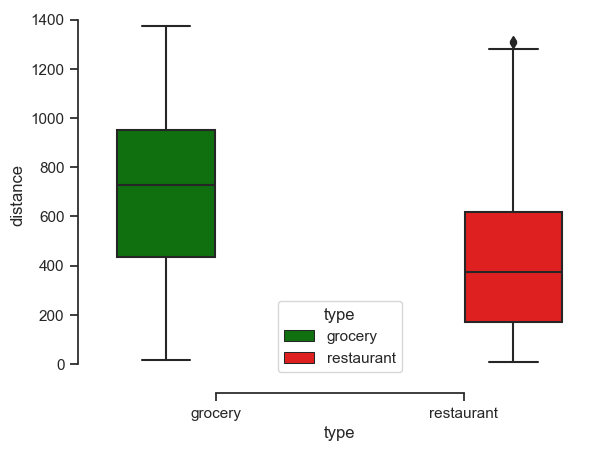

In [28]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="type", y="distance",
            hue="type", palette={'restaurant':'red', 'grocery':'green'},
            data=merged_df)
sns.despine(offset=10, trim=True)

The boxplot chart shows a comparison between the the distance distribution to bike stations for all grocery stores and restaurant dataset. Note that there is an outlier in the restaurant data but since it is not too far off from the whisker and there seems to be insignificant outlier datapoint, I have decided to keep the data in the data set.

The initial assumption is that since it is more likely for customers to ride a bike to restaurants than grocery stores, because it is not convenient to carry groceries with bikes. Both the scatter plot(dots more scattered around bike stations) and the box plot(majority of data points are between 400~1000 meters to bike stations, while restaurants are between 200~600) shows that the average distance from grocery stores to bike stations are more than restaurants. The result supports the assumption but detailed hypothesis tests must be done to make sure it is statistically significant.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [29]:
db_path = 'python_project.db'

conn = sqlite3.connect(db_path)

# Load the DataFrame into the SQLite database
merged_df3.to_sql('Yelp_data_all', conn, if_exists='replace', index=False)
yelp_grocery_df_d.to_sql('Yelp_data_grocery', conn, if_exists='replace', index=False)
yelp_restaurant_df_d.to_sql('Yelp_data_restaurant', conn, if_exists='replace', index=False)
df.to_sql('city_bike_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

Look at the data before and after the join to validate your data.

In [30]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return result
#Function to excute query

In [31]:
connection = sqlite3.connect('python_project.db')
select_restaurants = ("SELECT COUNT(*) FROM Yelp_data_restaurant")
restaurants = execute_read_query(connection, select_restaurants)

for restaurant in restaurants:
    print(restaurant)

(702,)


In [32]:
connection = sqlite3.connect('python_project.db')
select_grocery = ("SELECT COUNT(*) FROM Yelp_data_grocery")
groceries = execute_read_query(connection, select_grocery)

for grocery in groceries:
    print(grocery)

(339,)


In [33]:
connection = sqlite3.connect('python_project.db')
select_bike = ("SELECT COUNT(*) FROM city_bike_data")
bikes = execute_read_query(connection, select_bike)

for bike in bikes:
    print(bike)

(251,)


In [34]:
connection = sqlite3.connect('python_project.db')
join_tables = ("""SELECT COUNT(*) 
               FROM city_bike_data AS cbd
               FULL OUTER JOIN Yelp_data_grocery AS g
               ON cbd.name = g.name 
               FULL OUTER JOIN Yelp_data_restaurant AS r 
                ON cbd.name = r.name""")
bike_restaurant_grocery = execute_read_query(connection, join_tables)

for join_data in bike_restaurant_grocery:
    print(join_data)

(1292,)


In [35]:
connection = sqlite3.connect('python_project.db')
join_tables = ("""SELECT * 
               FROM city_bike_data AS cbd
               FULL OUTER JOIN Yelp_data_grocery AS g
               ON cbd.name = g.name 
               FULL OUTER JOIN Yelp_data_restaurant AS r 
                ON cbd.name = r.name""")
bike_restaurant_grocery = execute_read_query(connection, join_tables)

for join_data in bike_restaurant_grocery:
    print(join_data)

('7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 49.262487, -123.114397, 4, 32, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('32603a87cfca71d0f7dfa3513bad69d5', 'Yaletown-Roundhouse Station', 49.274566, -123.121817, 11, 5, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('6d42fa40360f9a6b2bf641c7b8bb2862', 'Dunsmuir & Beatty', 49.279764, -123.110154, 3, 23, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('66f873d641d448bd1572ab086665a458', '12th & Yukon (City Hall)', 49.260599, -123.113504, 2, 14, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('485d4d24c803cfde829ab89699fed833', '8th & Ash', 49.264215, -123.117772, 0, 16, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
('b07d513f

In [36]:
connection = sqlite3.connect('python_project.db')
select_all = ("SELECT COUNT(*) FROM Yelp_data_all")
all = execute_read_query(connection, select_all)

for items in all:
    print(all)

[(1280,)]


The join data using sqlite query seem to return the same number of result from the merged dataset from pandas dataframe.